In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [16]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [84]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [89]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


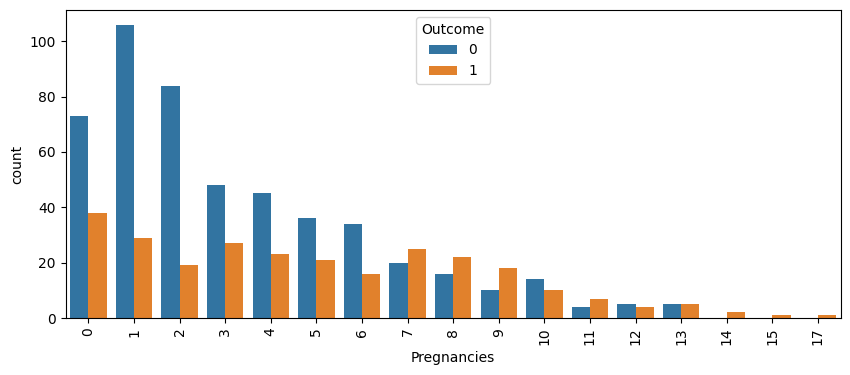

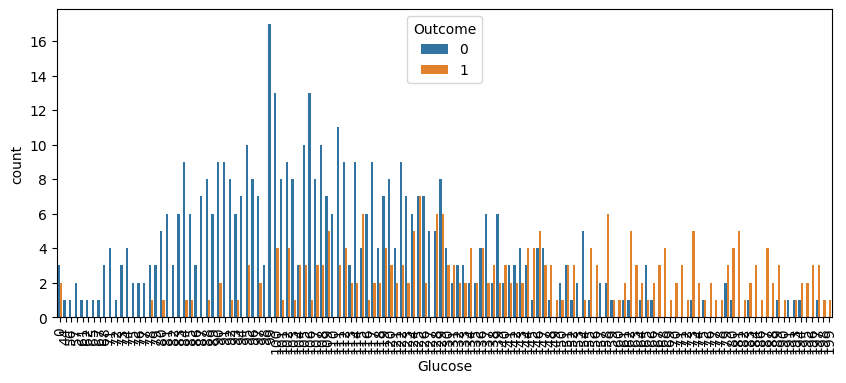

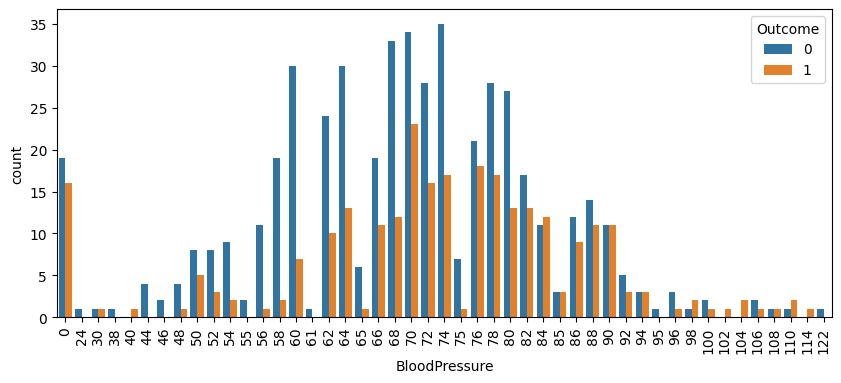

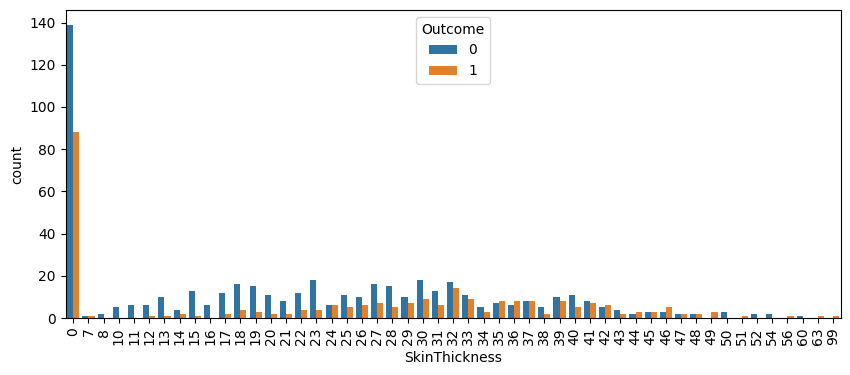

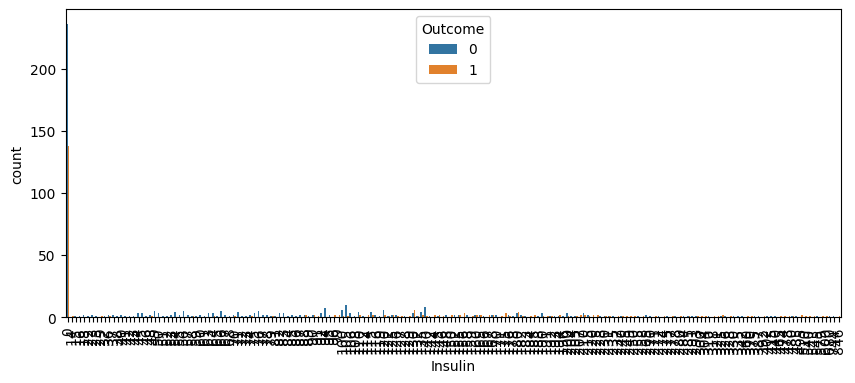

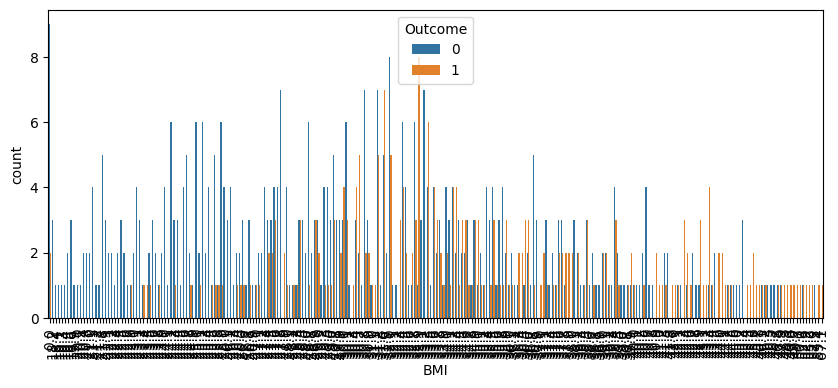

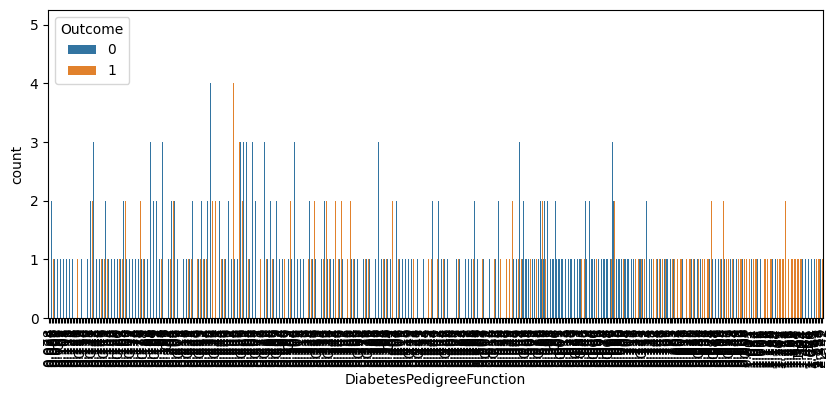

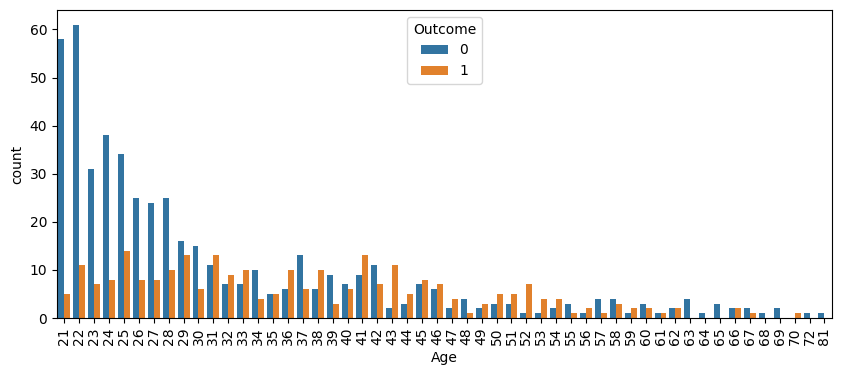

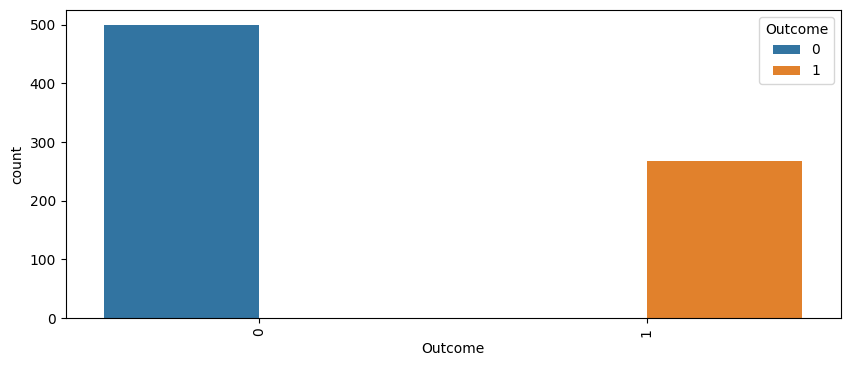

In [97]:
for i in df:
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90)
    g = sns.countplot(x = df[i], data = df, hue='Outcome')
    #g.set_xticklabels(rotation=30)
    plt.show()

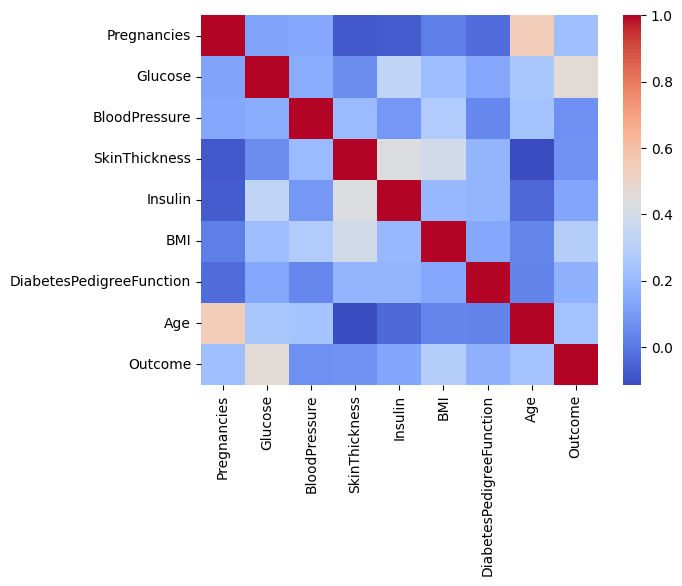

In [96]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [86]:
pca = PCA(n_components = 2)
PCA = pca.fit_transform(df)
PCA = PCA+100
PCA2 = np.round(PCA, decimals = 4)
PCA2

array([[ 24.2858,  64.0451],
       [ 17.6415, 128.9096],
       [ 25.3698,  32.0904],
       ...,
       [132.113 , 103.3792],
       [ 19.7859,  85.8094],
       [ 18.6917, 121.623 ]])

In [60]:
pca_df = pd.DataFrame(data = PCA2, columns=["pca1", "pca2"])
pca_df = pd.concat([pca_df,df['Outcome']],axis=1)
pca_df

,pca1,pca2,Outcome
0,24.2858,64.0451,1
1,17.6415,128.9096,0
2,25.3698,32.0904,1
3,111.0772,134.9002,0
4,189.7442,97.2487,1
...,...,...,...
763,199.2377,125.0830,0
764,21.3586,92.3142,0
765,132.1130,103.3792,0
766,19.7859,85.8094,1


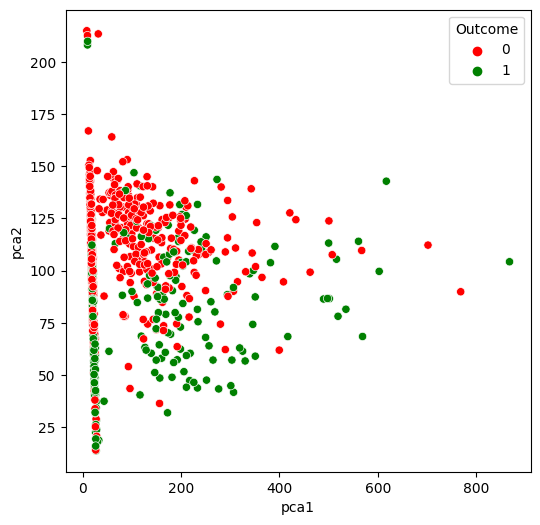

In [61]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "Outcome", data = pca_df,
                     palette = ["red", "green"])
plt.show()

In [64]:
#export
pca_df.to_json('Pca_diabetes.json', orient = 'values', compression = 'infer')#, index = False)